In [30]:
from sklearn.datasets import fetch_openml

# Load Titanic dataset from OpenML
titanic = fetch_openml(name="titanic", version=1, as_frame=True, parser="auto")
df_original = titanic.frame
print(df_original.head())
print(df_original.info())
print(f"Rows: {len(df_original)}")

   pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
1       1        1                   Allison, Master. Hudson Trevor    male   
2       1        0                     Allison, Miss. Helen Loraine  female   
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis,

In [31]:
#1. Remove Duplicates
# Drop duplicate rows if any
df = df_original.drop_duplicates()
print("Any duplicates?", df.duplicated().any())
print("Number of duplicates:", df.duplicated().sum())
print(f"Rows: {len(df)}")

Any duplicates? False
Number of duplicates: 0
Rows: 1309


In [32]:
#2. Handle Missing Values

# Check missing values
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [33]:
# fill with mean/median:
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

In [34]:
# Only 2 missing → fill with the mode (most common port).
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

In [35]:
# Drop cabin, boat, body, home.dest:
# Since they are >70% missing, usually dropped.
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True)

In [36]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


In [9]:
# Check missing values
print(df.isnull().sum())

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


In [37]:
#3. Check inconsistent formats

print(df.isin(["N/A", "na", "NA", "null", "NULL", "?", "--"]).sum())

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


In [38]:
# check unique values:
print(df['sex'].unique())

['female', 'male']
Categories (2, object): ['female', 'male']


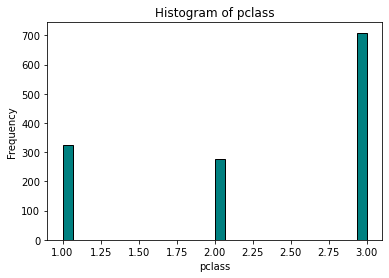

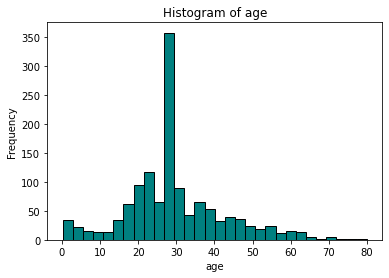

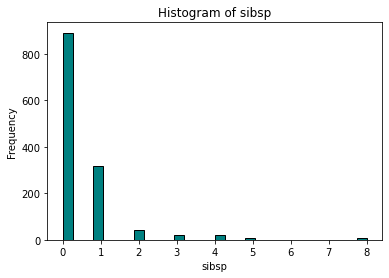

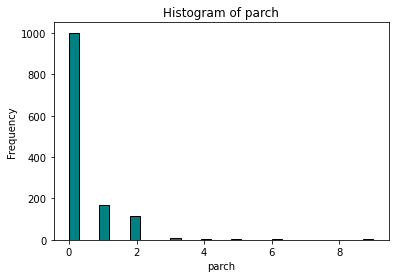

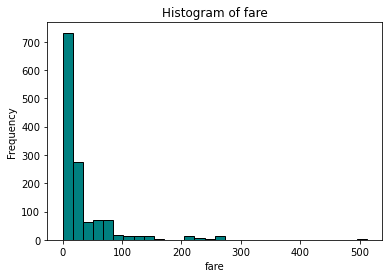

In [39]:
#4. Check Outlier with histogram
import matplotlib.pyplot as plt

# selects only the numeric columns from the DataFrame df.
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4)) # create a new figure width = 6 inches, height = 4 inches
    plt.hist(df[col].dropna(), bins=30, color="teal", edgecolor="black") #divides the range into 30 equal-width “buckets.”
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [27]:
# 5. check Data Types
print(df.dtypes)

pclass         int64
survived    category
name          object
sex         category
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
embarked    category
dtype: object


In [28]:
df['survived'] = df['survived'].astype('int64')   # keep 0/1